In this case study we will work with MNIST dataset. Both as image dataset and flatten dataset. 

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd 

In [2]:

import matplotlib.pyplot as plt


In [3]:


from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 
from keras.optimizers import SGD 
from keras.utils import np_utils 

np.random.seed(0) 

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
y_train[1]

0

<IPython.core.display.Javascript object>


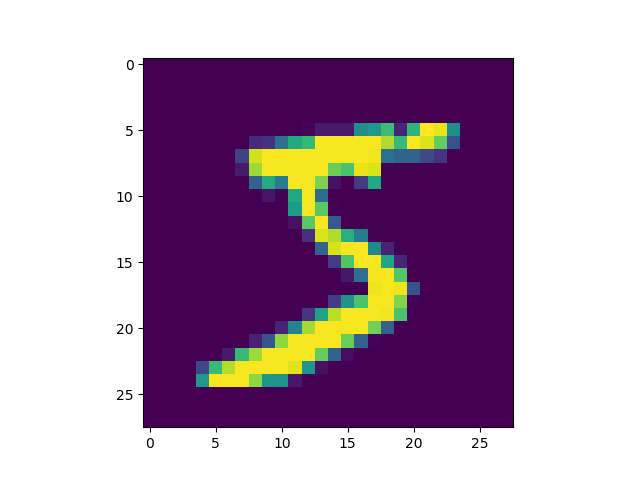

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
y_train[0]

5

In [10]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_train[0].shape

(10,)

In [11]:
X_train_flat = X_train.reshape(60000, 784).astype('float32')
X_test_flat = X_test.reshape(10000, 784).astype('float32')
X_train_flat[0].shape

(784,)

#### Single Layer Perceptron

In [12]:
# 1 - Build the model
model = Sequential() 
model.add(Dense(10, input_dim = 784, kernel_initializer = 'uniform', activation = 'softmax')) 

In [13]:
# 2 - Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# 3 - Fit the model
model.fit(X_train_flat, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.4241 - acc: 0.8887
Epoch 2/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2945 - acc: 0.9179
Epoch 3/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2771 - acc: 0.9222
Epoch 4/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.2691 - acc: 0.9248
Epoch 5/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.2631 - acc: 0.9270
Epoch 6/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2592 - acc: 0.9279
Epoch 7/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2553 - acc: 0.9288
Epoch 8/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2533 - acc: 0.9299
Epoch 9/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2507 - acc: 0.9313
Epoch 10/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2492 - a

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 4 - Evaluate
score = model.evaluate(X_test_flat, y_test, verbose = 0)
print("Test score:", score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3081566184267402
Test accuracy: 0.9249


#### Multi-Layer Perceptron

In [17]:
# 1 - Build the model
model = Sequential() 
model.add(Dense(128, input_dim = 784, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'uniform', activation = 'softmax')) 

In [18]:
# 2 - Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
# 3 - Fit the model
model.fit(X_train_flat, y_train, epochs = 50, batch_size = 20)

Epoch 1/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.2766 - acc: 0.9225
Epoch 2/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.1195 - acc: 0.9640
Epoch 3/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0807 - acc: 0.9755
Epoch 4/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0595 - acc: 0.9818
Epoch 5/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0453 - acc: 0.9858
Epoch 6/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0370 - acc: 0.9884
Epoch 7/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.0307 - acc: 0.9903
Epoch 8/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.0237 - acc: 0.9927
Epoch 9/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.0205 - acc: 0.9938
Epoch 10/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.0159 - a

In [21]:
# 4 - Evaluate
score = model.evaluate(X_test_flat, y_test, verbose = 0)
print("Test score:", score[0]) 
print('Test accuracy:', score[1])

Test score: 0.14222420511748643
Test accuracy: 0.9787


#### Convolutional Neural Network

<IPython.core.display.Javascript object>


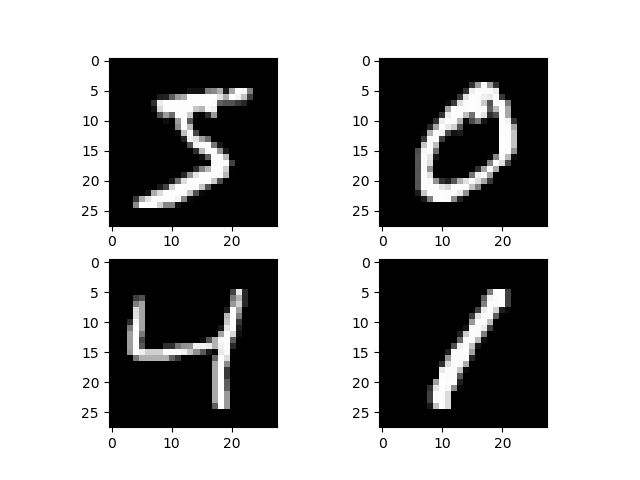

In [22]:
%matplotlib notebook
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [29]:
import numpy

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras import backend as K
K.set_image_dim_ordering('th')

numpy.random.seed(0)

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [32]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Typical Convnet architectures stack a few convolutional layers (each one generally followed by a ReLU layer), then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on. 

In [33]:
# 1 - create model

model = Sequential()
 
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(1,28,28)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [34]:
# 2 - Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 3 - train

model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 173s 3ms/step - loss: 3.9947 - acc: 0.7082 2s 
Epoch 2/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2417 - acc: 0.9327 0s - loss: 0.2420 - acc: 
Epoch 3/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.1756 - acc: 0.9496
Epoch 4/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.1468 - acc: 0.9581
Epoch 5/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.1345 - acc: 0.9607 
Epoch 6/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.1220 - acc: 0.9655
Epoch 7/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.1186 - acc: 0.9664 1s - loss: 0.1181 
Epoch 8/10
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1130 - acc: 0.9676
Epoch 9/10
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1041 - acc: 0.9705
Epoch 10/10
48544/60000 [================